<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-46/blob/main/Actividad_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4
## Reduccion de datos
## Ciencia y analítica de datos
### Profesor: Jobish Vallikavungal Devassia
### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
#### Matricula A01793654

# Primera parte

# Información de los datos

#### Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. 

#### Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

#### X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
#### X2: Género (1 = masculino; 2 = femenino).
#### X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
#### X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
#### X5: Edad (año).
#### X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
#### X12-X17: Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
#### X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

In [211]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
# obtenemos la ruta de la informacion 

inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [169]:
# generamos el dataframe

df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [170]:
# revisamos la cantidad de registros y columnas

df.shape

(30000, 24)

In [187]:
# revisarmos los datos nulos 
df.isnull().values.any() 

True

In [188]:
 # identificamos las columnas con valores nulos

df.isnull().any() 

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# Limpieza de datos

se procede a quitar las variables categoricas dejando unicamente las numericas asi como la columa Y que es la variable de respuesta.

In [199]:
# obtenemos el total de registros y copiamos a un nuevo dataframe y obtenemos la lista de las columnas

ndf = df.copy()
ndf.shape

(30000, 24)

In [200]:
# eliminamos los valores nulos y revisamos el total de informacion

ndf.dropna(inplace = True)
ndf.shape

(29958, 24)

In [201]:
# se observa que no es representativo el total de valores nulos
print(1-(ndf.shape[0]/df.shape[0]) ) 

0.0013999999999999568


In [202]:
# se revisa de nuevo que ya no existan valores nulos
print(ndf.isna().values.any() )
print(ndf.isnull().values.any())

False
False


In [203]:
# quitamos las variables categoricas segun la descripcion de los datos

adf = ndf.copy()

lista = {'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'}
adf.drop(lista, 
         axis = 1, 
         inplace = True
        )

In [205]:
# revisamos de nuevo la informacion

adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X5      29958 non-null  float64
 2   X12     29958 non-null  float64
 3   X13     29958 non-null  float64
 4   X14     29958 non-null  float64
 5   X15     29958 non-null  float64
 6   X16     29958 non-null  float64
 7   X17     29958 non-null  float64
 8   X18     29958 non-null  float64
 9   X19     29958 non-null  float64
 10  X20     29958 non-null  float64
 11  X21     29958 non-null  float64
 12  X22     29958 non-null  float64
 13  X23     29958 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.4 MB


In [206]:
# se realiza la correlacion de las variables

adf.corr()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X5,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
X12,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
X19,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


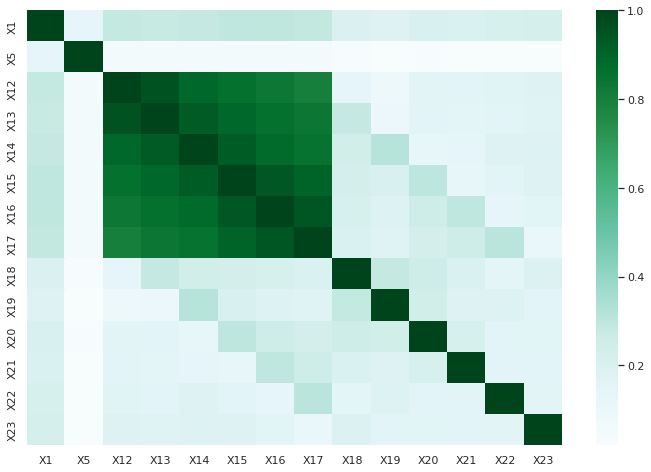

In [207]:
# para visualizar mejor la correlacion 

sns.set(rc={'figure.figsize':(12,8)}) 
misdatoscorr = adf.corr()
ax = sns.heatmap(misdatoscorr, cmap="BuGn")
plt.show()

In [212]:
## se observa que existe multiples variables con correlacion muy alta positivamente
## aplicamos PCA para normalizar la informacion

pcs = PCA() 
pcs.fit(preprocessing.scale(adf.dropna(axis=0)))

PCA()

In [213]:
pcsSumdf = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSumdf = pcsSumdf.transpose()
pcsSumdf.columns = ['PC{}'.format(i) for i in range(1, len(pcsSumdf.columns) + 1)]
pcsSumdf.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000
